<a href="https://colab.research.google.com/github/afdmoraes/GEOSelper/blob/main/Tarefa_da_Semana_3_Exemplo_de_solu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa da Semana 3 - Exemplo de solução
---

Esta é a terceira tarefa do curso de Programação para Sensoriamento Remoto. Crie um Jupyter Notebook no seu Google Colab para reportar os resultados obtidos. Inclua blocos de código e texto para informar as partes realizadas.

**Atividades**

Faça o download de um recorte da imagem Landsat-8 (`LO82190762017351CUB00_B123456789_crop.tif`) e insira no seu Jupyter Notebook. A imagem possui 9 bandas, nesta ordem:
* 1 coastal
* 2 blue
* 3 green
* 4 red
* 5 nir
* 6 swir1
* 7 swir2
* 8 pan
* 9 cirrus

**(a)** calcule 3 índices espectrais (NDVI, NDWI e NDBI) e crie plots dos 3 resultados. O NDBI (*Normalized Difference Built-up Index*) gera um produto que ressalta áreas construídas, e tem a seguinte fórmula:

`NDBI = (SWIR1 - NIR) / (SWIR1 + NIR)`

**(b)** crie um plot com 1 linha e 3 colunas, apresentando as imagens dos 3 índices calculados.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


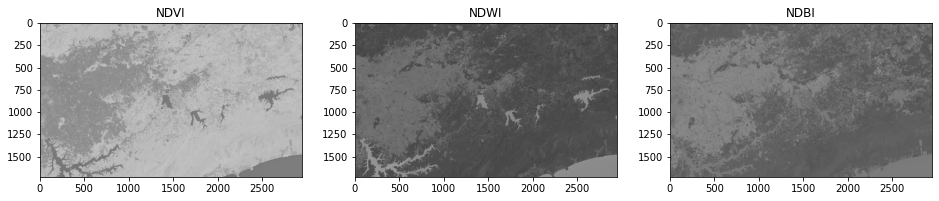

In [ ]:
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# abrir a imagem e armazenar em um dataset
dataset = gdal.Open("LO82190762017351CUB00_B123456789_crop.tif", gdal.GA_ReadOnly)

# relembrando as formulas dos 3 indices
# NDVI = (nir - red) / (nir + red)
# NDWI = (green - nir) / (green + nir)
# NDBI = (swir - nir) / (swir + nir)

# obter as bandas correspondentes do dataset
banda_nir = dataset.GetRasterBand(5)
banda_red = dataset.GetRasterBand(4)
banda_green = dataset.GetRasterBand(3)
banda_swir = dataset.GetRasterBand(6)

# obter as matrizes de pixels das bandas
# e converter para o tipo ponto flutuante
matriz_nir = banda_nir.ReadAsArray().astype(float)
matriz_red = banda_red.ReadAsArray().astype(float)
matriz_green = banda_green.ReadAsArray().astype(float)
matriz_swir = banda_swir.ReadAsArray().astype(float)

# calcular os indices
matriz_ndvi = (matriz_nir - matriz_red) / (matriz_nir + matriz_red);
matriz_ndwi = (matriz_green - matriz_nir) / (matriz_green + matriz_nir);
matriz_ndbi = (matriz_swir - matriz_nir) / (matriz_swir + matriz_nir);

# apresentar os resultados na tela
# criar uma figura para mostrar os resultados
plt.figure(figsize=(16, 8))

# definir um plot com 3 colunas, 1 linha
# desenhar a primeira matriz
plt.subplot(131)
plt.title("NDVI")
plt.imshow(matriz_ndvi, cmap='gray', vmin=-1.0, vmax=1.0);

# desenhar a segunda matriz
plt.subplot(132)
plt.title("NDWI")
plt.imshow(matriz_ndwi, cmap='gray', vmin=-1.0, vmax=1.0);

# desenhar a terceira matriz
plt.subplot(133)
plt.title("NDBI")
plt.imshow(matriz_ndbi, cmap='gray', vmin=-1.0, vmax=1.0);

**(c)** mostre os valores mínimos e máximos de cada uma das 9 bandas da imagem.

In [ ]:
# obter o numero de bandas
numero_de_bandas = dataset.RasterCount

# navegar por todas as bandas e apresentar
# os valores minimos e maximos
for i in range(1, numero_de_bandas + 1):
  print('Mostrando valores da banda', i)
  print(dataset.GetRasterBand(i).ComputeRasterMinMax())

Mostrando valores da banda 1
(0.0, 54603.0)
Mostrando valores da banda 2
(0.0, 52485.0)
Mostrando valores da banda 3
(0.0, 57614.0)
Mostrando valores da banda 4
(0.0, 65535.0)
Mostrando valores da banda 5
(0.0, 65535.0)
Mostrando valores da banda 6
(0.0, 65535.0)
Mostrando valores da banda 7
(0.0, 59742.0)
Mostrando valores da banda 8
(0.0, 65535.0)
Mostrando valores da banda 9
(0.0, 11059.0)


In [ ]:
# para finalizar tudo, fechar o dataset
dataset = None